![title](LogisticRegression.jpg)

### 先定义一个 sigmoid 函数

In [1]:
import numpy as np
def sigmoid(x):   
    return 1 / (1 + np.exp(-x)) 

### 定义模型参数初始化函数

In [2]:
def init_params(dim):
    W = np.zeros((dim, 1))
    b = 0
    return W, b

### 定义逻辑回归主题函数：模型计算公式、损失函数和参数的梯度公式

In [3]:
def logistic(X, y, W, b):
    num_train = X.shape[0]
    num_feature = X.shape[1]

    a = sigmoid(np.dot(X, W) + b)
    cost = -1/num_train * np.sum(y*np.log(a) + (1-y)*np.log(1-a))

    dW = np.dot(X.T, (a-y))/num_train
    db = np.sum(a-y)/num_train
    cost = np.squeeze(cost) 

    return a, cost, dW, db

### 定义梯度下降的参数更新过程

In [4]:
def logistic_train(X, y, learning_rate, epochs):    
    # 初始化模型参数
    W, b = init_params(X.shape[1])  
    cost_list = []  

    # 迭代训练
    for i in range(epochs):       
        # 计算当前次的模型计算结果、损失和参数梯度
        a, cost, dW, db = logistic(X, y, W, b)    
        # 参数更新
        W = W -learning_rate * dW
        b = b -learning_rate * db        

        # 记录损失
        if i % 100 == 0:
            cost_list.append(cost)   
        # 打印训练过程中的损失 
        if i % 100 == 0:
            print('epoch %d cost %f' % (i, cost)) 

    # 保存参数
    params = {            
        'W': W,            
        'b': b
    }        
    # 保存梯度
    grads = {            
        'dW': dW,            
        'db': db
    }           
    return cost_list, params, grads

### 定义对测试数据的预测函数

In [5]:
def predict(X, params):
    y_predic = sigmoid(np.dot(X, params['W']) + params['b']) 
    print(y.shape)
    for i in range(len(y_predic)):        
        if y_predic[i] > 0.5:
            y_predic[i] = 1
        else:
            y_predic[i] = 0
    return y_predic

### 导入数据并处理

In [6]:
def init_data():
    data = np.loadtxt('LogisticRegression.csv')
    dataMatIn = data[:, 0:-1]
    classLabels = data[:, -1]
    dataMatIn = np.insert(dataMatIn, 0, 1, axis=1)  #特征数据集，添加1是构造常数项x0
    return dataMatIn, classLabels
init_data()

(array([[ 1.0000000e+00, -1.7612000e-02,  1.4053064e+01],
        [ 1.0000000e+00, -1.3956340e+00,  4.6625410e+00],
        [ 1.0000000e+00, -7.5215700e-01,  6.5386200e+00],
        [ 1.0000000e+00, -1.3223710e+00,  7.1528530e+00],
        [ 1.0000000e+00,  4.2336300e-01,  1.1054677e+01],
        [ 1.0000000e+00,  4.0670400e-01,  7.0673350e+00],
        [ 1.0000000e+00,  6.6739400e-01,  1.2741452e+01],
        [ 1.0000000e+00, -2.4601500e+00,  6.8668050e+00],
        [ 1.0000000e+00,  5.6941100e-01,  9.5487550e+00],
        [ 1.0000000e+00, -2.6632000e-02,  1.0427743e+01],
        [ 1.0000000e+00,  8.5043300e-01,  6.9203340e+00],
        [ 1.0000000e+00,  1.3471830e+00,  1.3175500e+01],
        [ 1.0000000e+00,  1.1768130e+00,  3.1670200e+00],
        [ 1.0000000e+00, -1.7818710e+00,  9.0979530e+00],
        [ 1.0000000e+00, -5.6660600e-01,  5.7490030e+00],
        [ 1.0000000e+00,  9.3163500e-01,  1.5895050e+00],
        [ 1.0000000e+00, -2.4205000e-02,  6.1518230e+00],
        [ 1.00

In [7]:
import matplotlib.pyplot as plt

xcord1 = []
ycord1 = []
xcord2 = []
ycord2 = []

dataMatIn, classLabels = init_data()
n = np.shape(dataMatIn)[0]

for i in range(n):
    if classLabels[i] == 1:
        xcord1.append(dataMatIn[i][1])
        ycord1.append(dataMatIn[i][2])
    else:
        xcord2.append(dataMatIn[i][1])
        ycord2.append(dataMatIn[i][2])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xcord1, ycord1,s=30, c='red', marker='s')
ax.scatter(xcord2, ycord2, s=30, c='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()   

<Figure size 640x480 with 1 Axes>

### 把数据分为训练集和测试集进行训练

In [11]:
from sklearn.model_selection import train_test_split
X  = dataMatIn[:,1:]
y = classLabels
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

X_train= (70, 2)
X_test= (30, 2)
y_train= (70, 1)
y_test= (30, 1)


In [12]:
cost_list, params, grads = logistic_train(X_train, y_train, 0.01, 10000)

epoch 0 cost 0.693147
epoch 100 cost 0.558587
epoch 200 cost 0.519746
epoch 300 cost 0.486283
epoch 400 cost 0.457314
epoch 500 cost 0.432095
epoch 600 cost 0.410007
epoch 700 cost 0.390541
epoch 800 cost 0.373281
epoch 900 cost 0.357887
epoch 1000 cost 0.344080
epoch 1100 cost 0.331631
epoch 1200 cost 0.320349
epoch 1300 cost 0.310078
epoch 1400 cost 0.300688
epoch 1500 cost 0.292067
epoch 1600 cost 0.284123
epoch 1700 cost 0.276777
epoch 1800 cost 0.269963
epoch 1900 cost 0.263622
epoch 2000 cost 0.257705
epoch 2100 cost 0.252169
epoch 2200 cost 0.246977
epoch 2300 cost 0.242096
epoch 2400 cost 0.237498
epoch 2500 cost 0.233158
epoch 2600 cost 0.229052
epoch 2700 cost 0.225162
epoch 2800 cost 0.221470
epoch 2900 cost 0.217960
epoch 3000 cost 0.214619
epoch 3100 cost 0.211433
epoch 3200 cost 0.208391
epoch 3300 cost 0.205484
epoch 3400 cost 0.202701
epoch 3500 cost 0.200034
epoch 3600 cost 0.197476
epoch 3700 cost 0.195020
epoch 3800 cost 0.192659
epoch 3900 cost 0.190387
epoch 4000 c

### 对测试集数据进行预测

In [13]:
y_predic = predict(X_test, params)

print(y_predic)

(100,)
[[0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


### 准确率评估

In [14]:
from sklearn.metrics import r2_score
print('r2_score : ' + str(r2_score(y_test,y_predic)))

r2_score : 0.7333333333333334


### 最后展示训练后图像

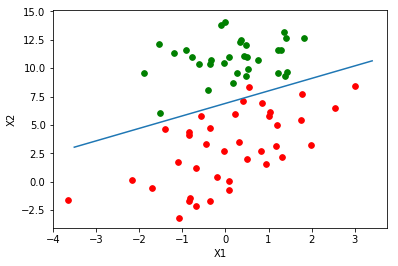

In [15]:
n = X_train.shape[0]
xcord1 = []
ycord1 = []
xcord2 = []
ycord2 = []    
for i in range(n):        
    if y_train[i] == 1:
        xcord1.append(X_train[i][0])
        ycord1.append(X_train[i][1])        
    else:
        xcord2.append(X_train[i][0])
        ycord2.append(X_train[i][1])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xcord1, ycord1,s=32, c='red')
ax.scatter(xcord2, ycord2, s=32, c='green')
x = np.arange(-3.5, 3.5, 0.1)
y = (-params['b'] - params['W'][0] * x) / params['W'][1]
ax.plot(x, y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()